In [6]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## cv IMREAD options
1. cv2.IMREAD_GRAYSCALE or 0: Loads image in grayscale mode
2. cv2.IMREAD_COLOR or 1: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. cv2.IMREAD_UNCHANGED or -1: Loads image as such including alpha channel.

In [4]:
%matplotlib inline

In [7]:
Image(filename='./nb1/checkerboard_18x18.png')

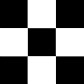

In [8]:
Image(filename='./nb1/checkerboard_84x84.jpg')

In [11]:
cb_img = cv.imread('./nb1/checkerboard_18x18.png', cv.IMREAD_GRAYSCALE)
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [12]:
print(f"Image (h, w) is {cb_img.shape}")

Image (h, w) is (18, 18)


In [14]:
print(f"{cb_img.dtype}")

uint8


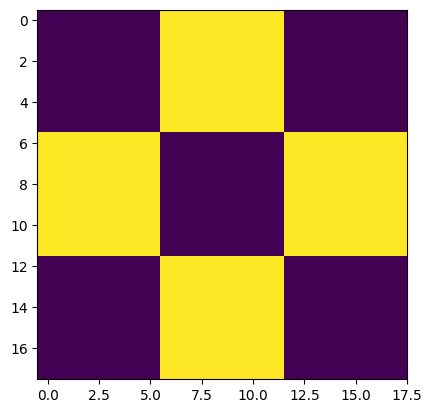

In [15]:
plt.imshow(cb_img)

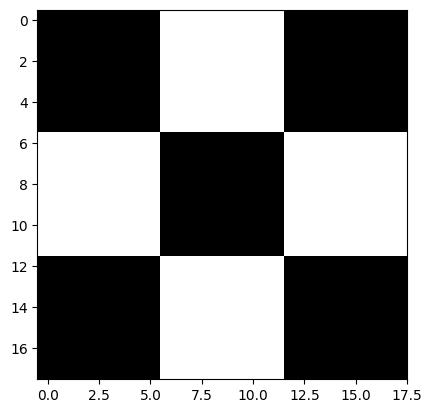

In [17]:
plt.imshow(cb_img, cmap='gray')

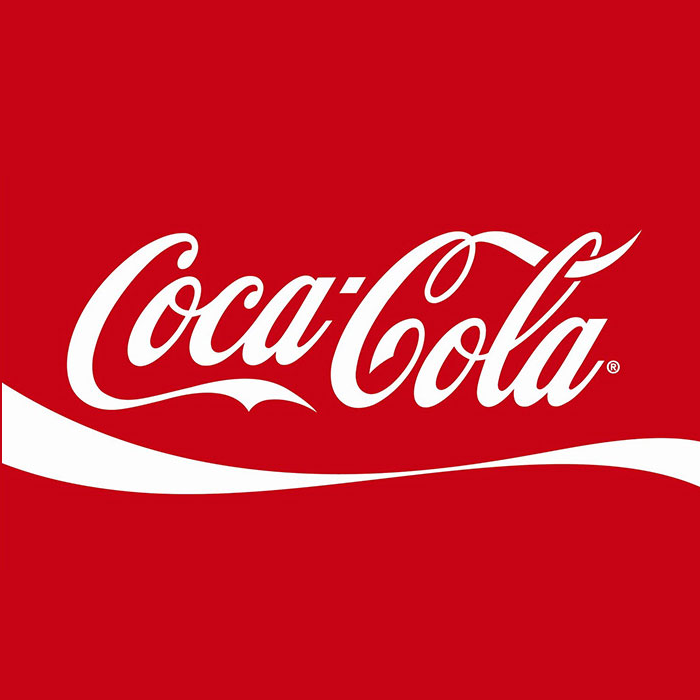

In [18]:
Image('./nb1/coca-cola-logo.png')

In [19]:
coke_img = cv.imread('./nb1/coca-cola-logo.png', cv.IMREAD_COLOR)
print(coke_img.shape)

(700, 700, 3)


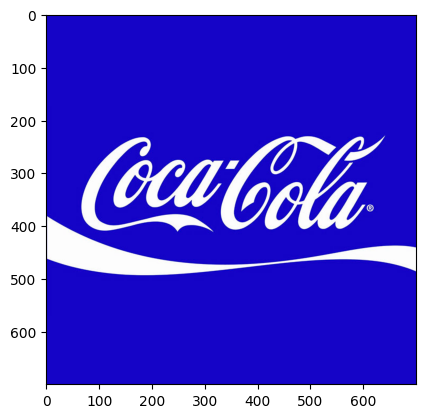

In [20]:
plt.imshow(coke_img)

matplotlib expects RGB but cv uses BGR

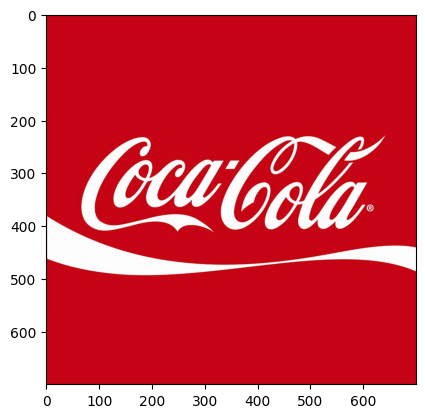

In [21]:
coke_img_reversed = coke_img[:,:,::-1]
plt.imshow(coke_img_reversed)

## Splitting and Merging Color Channels

`cv2.split()` Divides a multi-channel array into several single-channel arrays.

`cv2.merge()` Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

In [22]:
nz_img_bgr = cv.imread('./nb1/New_Zealand_Lake.jpg', cv.IMREAD_COLOR)
b, g, r = cv.split(nz_img_bgr)

In [31]:
plt.figure(figsize=[40,5])

<Figure size 4000x500 with 0 Axes>

<Figure size 4000x500 with 0 Axes>

Text(0.5, 1.0, 'Merged Output')

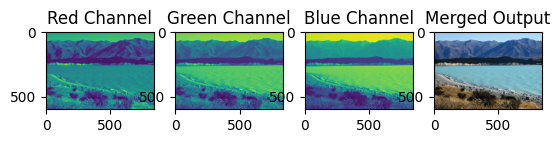

In [32]:
plt.subplot(141);plt.imshow(r);plt.title('Red Channel')
plt.subplot(142);plt.imshow(g);plt.title('Green Channel')
plt.subplot(143);plt.imshow(b);plt.title('Blue Channel')

nz_img_merged = cv.merge((b,g,r))
plt.subplot(144);plt.imshow(nz_img_merged[:,:,::-1]);plt.title('Merged Output')

## Converting to different Color Spaces

`cv2.cvtColor()` Converts an image from one color space to another. The function converts an input image from one color space to another. 

In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). 

So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

`dst = cv2.cvtColor( src, code )` **dst** is the output image of the same size and depth as src.  The function has 2 required arguments:
* **src** input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.
* **code** color space conversion code (see ColorConversionCodes).

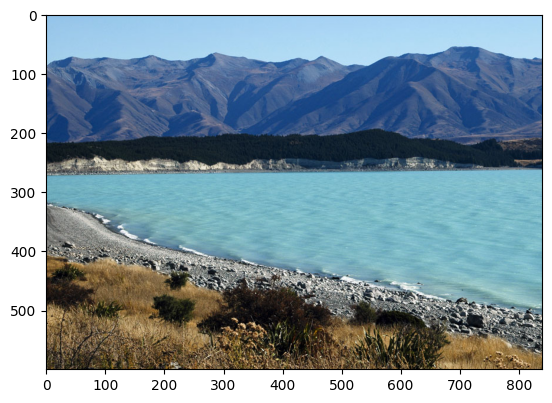

In [26]:
nz_img_rgb = cv.cvtColor(cv.imread('./nb1/New_Zealand_Lake.jpg', cv.IMREAD_COLOR), cv.COLOR_BGR2RGB)
plt.imshow(nz_img_rgb)

In [27]:
print(f"nz_img_rgb size {nz_img_rgb.shape}")

nz_img_rgb size (600, 840, 3)


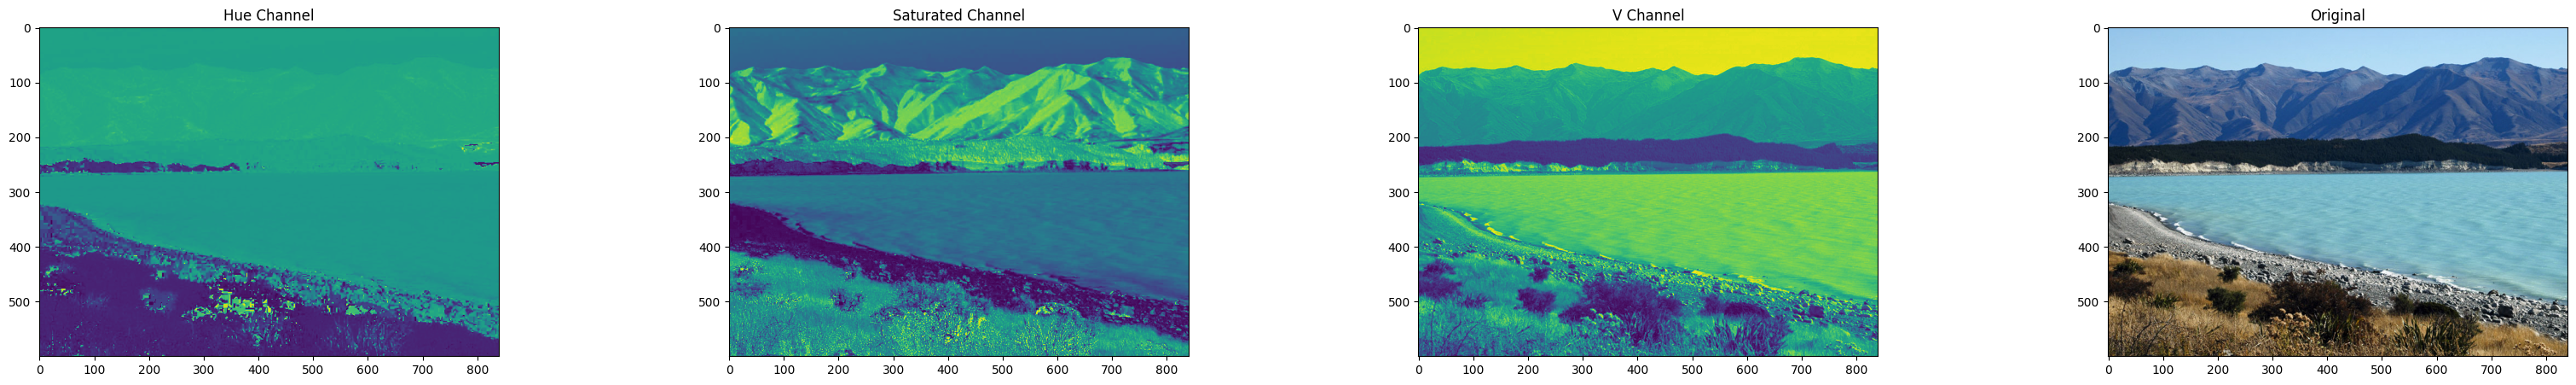

In [29]:
nz_img_hsv = cv.cvtColor(nz_img_bgr, cv.COLOR_BGR2HSV)
h,s,v = cv.split(nz_img_hsv)

plt.figure(figsize=[40,5])
plt.subplot(141);plt.imshow(h);plt.title('Hue Channel');
plt.subplot(142);plt.imshow(s);plt.title('Saturated Channel');
plt.subplot(143);plt.imshow(v);plt.title('V Channel');
plt.subplot(144);plt.imshow(nz_img_rgb);plt.title('Original');

### Modifying individual Channel

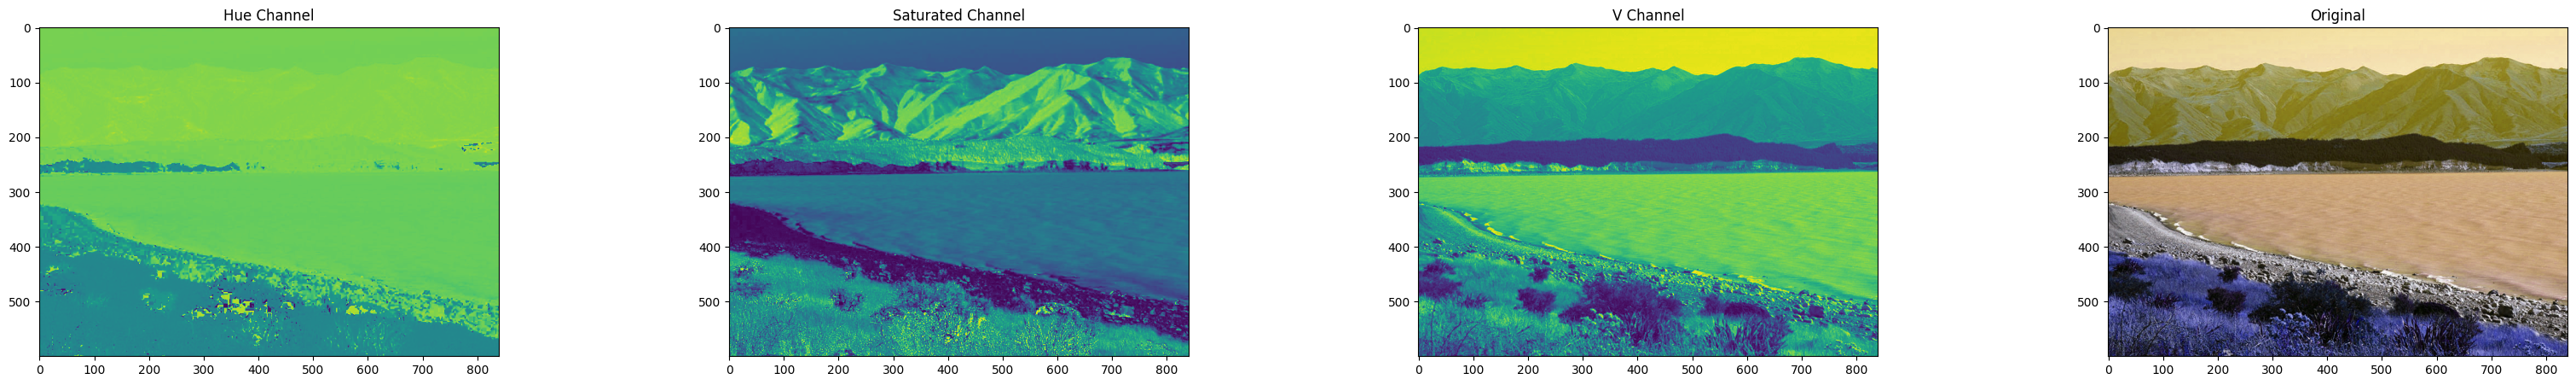

In [35]:
h_new = h + 100
nz_img_hsv_merged = cv.merge((h_new, s, v))
nz_img_rgb_h_enhanced = cv.cvtColor(nz_img_hsv_merged, cv.COLOR_HSV2RGB)

plt.figure(figsize=[40,5])
plt.subplot(141);plt.imshow(h_new);plt.title('Hue Channel');
plt.subplot(142);plt.imshow(s);plt.title('Saturated Channel');
plt.subplot(143);plt.imshow(v);plt.title('V Channel');
plt.subplot(144);plt.imshow(nz_img_rgb_h_enhanced);plt.title('Original');